In [1]:
# dataframes
import pandas as pd
from numpy.random import rand, randn, beta, poisson
from numpy import sin
import numpy as np
import scipy
import math

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# for choosing covariates to include in model
from patsy import dmatrices 

In [2]:
df = pd.read_csv('shark_tank.csv', encoding='latin-1')

In [3]:
df.head()

,Season.Number,Season.Start,Season.End,Episode.Number,Pitch.Number,Original.Air.Date,Startup.Name,Industry,Business.Description,Pitchers.Gender,...,Kevin.O.Leary.Investment.Equity,Guest.Investment.Amount,Guest.Investment.Equity,Guest.Name,Barbara.Corcoran.Present,Mark.Cuban.Present,Lori.Greiner.Present,Robert.Herjavec.Present,Daymond.John.Present,Kevin.O.Leary.Present
0,1,08/09/2009,02/05/2010,1,1,08/09/2009,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
1,1,08/09/2009,02/05/2010,1,2,08/09/2009,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
2,1,08/09/2009,02/05/2010,1,3,08/09/2009,Wispots,Business Services,Wispots - Consumer Services,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
3,1,08/09/2009,02/05/2010,1,4,08/09/2009,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
4,1,08/09/2009,02/05/2010,1,5,08/09/2009,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1


In [6]:
# Prediction field
prediction = 'Total.Deal.Amount'

# Numerical predictors to use
fields = ['Valuation.Requested','Number.of.sharks.in.deal','Original.Ask.Amount',\
                   'Original.Offered.Equity', 
                   'Loan', 'Barbara.Corcoran.Present', 'Mark.Cuban.Present', \
          'Lori.Greiner.Present', 'Robert.Herjavec.Present', 'Daymond.John.Present', 'Kevin.O.Leary.Present', 'Industry']

# Categorical predictors to use
categorical_fields = ['Pitchers.Gender', 'Industry']

In [7]:
len(fields)

12

<ipython-input-8-f28da5b26941>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['Total.Deal.Amount']].sort_values(by='Total.Deal.Amount', ascending=False), ax=ax)


<Axes: >

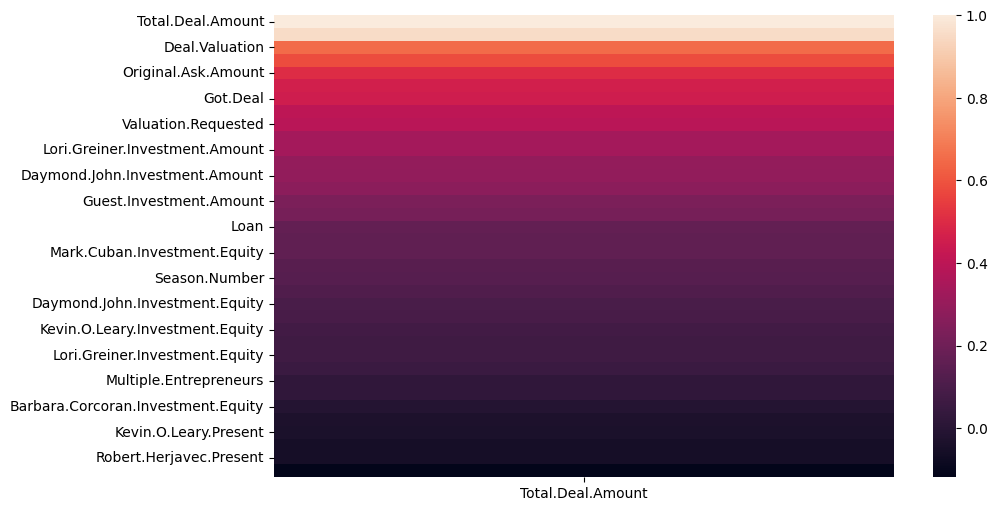

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df.corr()[['Total.Deal.Amount']].sort_values(by='Total.Deal.Amount', ascending=False), ax=ax)

In [9]:
corr = df.corr()[['Total.Deal.Amount']].sort_values(by='Total.Deal.Amount', ascending=False)
# sns.heatmap(corr, annot=True)
corr

<ipython-input-9-68a314395455>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()[['Total.Deal.Amount']].sort_values(by='Total.Deal.Amount', ascending=False)


,Total.Deal.Amount
Total.Deal.Amount,1.000000
Investment.Amount.Per.Shark,0.953474
Deal.Valuation,0.653566
Robert.Herjavec.Investment.Amount,0.583801
Original.Ask.Amount,0.505158
Mark.Cuban.Investment.Amount,0.458529
Got.Deal,0.451348
Number.of.sharks.in.deal,0.404713
Valuation.Requested,0.389195
Kevin.O.Leary.Investment.Amount,0.338206


In [ ]:
df.columns

Index(['Season.Number', 'Season.Start', 'Season.End', 'Episode.Number',
       'Pitch.Number', 'Original.Air.Date', 'Startup.Name', 'Industry',
       'Business.Description', 'Pitchers.Gender', 'Pitchers.City',
       'Pitchers.State', 'Entrepreneur.Names', 'Multiple.Entrepreneurs',
       'Original.Ask.Amount', 'Original.Offered.Equity', 'Valuation.Requested',
       'Got.Deal', 'Total.Deal.Amount', 'Total.Deal.Equity', 'Deal.Valuation',
       'Number.of.sharks.in.deal', 'Investment.Amount.Per.Shark',
       'Equity.Per.Shark', 'Royalty.Deal', 'Loan',
       'Barbara.Corcoran.Investment.Amount',
       'Barbara.Corcoran.Investment.Equity', 'Mark.Cuban.Investment.Amount',
       'Mark.Cuban.Investment.Equity', 'Lori.Greiner.Investment.Amount',
       'Lori.Greiner.Investment.Equity', 'Robert.Herjavec.Investment.Amount',
       'Robert.Herjavec.Investment.Equity', 'Daymond.John.Investment.Amount',
       'Daymond.John.Investment.Equity', 'Kevin.O.Leary.Investment.Amount',
       'Kevin

In [10]:
# Industry

# clean_x = df.drop(columns=['Total.Deal.Amount', 'Investment.Amount.Per.Shark','Guest.Name','Business.Description','Industry'])
# X = sm.add_constant(df[['Original.Ask.Amount','Valuation.Requested','Original.Offered.Equity']])
# get dummies
# df_copy = df.drop(columns=['Total.Deal.Amount', 'Investment.Amount.Per.Shark','Guest.Name', 'Entrepreneur.Names','Business.Description','Pitchers.Gender'])
df_copy = df.copy()
df_copy = df_copy[df_copy['Got.Deal'] == 1]

total = df_copy['Total.Deal.Amount']

df_copy = df_copy[['Valuation.Requested','Number.of.sharks.in.deal','Original.Ask.Amount',\
                   'Original.Offered.Equity', 
                   'Loan', 'Barbara.Corcoran.Present', 'Mark.Cuban.Present', \
          'Lori.Greiner.Present', 'Robert.Herjavec.Present', 'Daymond.John.Present', 'Kevin.O.Leary.Present', 'Industry']]

dumm = pd.get_dummies(data=df_copy,drop_first=True)

X = sm.add_constant(dumm)

model_industry = sm.OLS(total, X).fit()
model_industry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total.Deal.Amount   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 15 May 2023   Prob (F-statistic):          5.65e-210
Time:                        18:31:36   Log-Likelihood:                -8604.2
No. Observations:                 643   AIC:                         1.726e+04
Df Residuals:                     617   BIC:                         1.738e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.017e+05   8.68e+04      1.171      0.242   -6.88e+04    2.72e+05
Valuation.Requested                  0.0024      0.002      1.089      0.277      -0.002       0.007
Number.of.sharks.in.deal          4.519e+04   1.04e+04      4.362      0.000    2.48e+04    6.55e+04
Original.Ask.Amount                  0.9849      0.029     33.540      0.000       0.927       1.043
Original.Offered.Equity          -1005.5049    971.618     -1.035      0.301   -2913.585     902.575
Loan                             -5.955e+04   2.71e+04     -2.195      0.029   -1.13e+05   -6281.804
Barbara.Corcoran.Present          1.267e+04   2.03e+04      0.626      0.532   -2.71e+04    5.24e+04
Mark.Cuban.Present                3.112e+04   3.33e+04      0.935      0.350   -3.43e+04    9.65e+04
Lori.Greiner.Present              2.752e+04   3.05e+04      0.903      0.367   -3.24e+04    8.74e+04
Robert.Herjavec.Present           3.172e+04   1.72e+04      1.848      0.065   -1990.427    6.54e+04
Daymond.John.Present              3.174e+04   1.96e+04      1.621      0.106   -6711.340    7.02e+04
Kevin.O.Leary.Present             3.223e+04   3.34e+04      0.965      0.335   -3.33e+04    9.78e+04
Industry_Business Services       -2.952e+05    6.8e+04     -4.338      0.000   -4.29e+05   -1.62e+05
Industry_Children/Education      -2.587e+05   5.45e+04     -4.745      0.000   -3.66e+05   -1.52e+05
Industry_Electronics             -2.709e+05   8.84e+04     -3.064      0.002   -4.44e+05   -9.73e+04
Industry_Fashion/Beauty          -2.694e+05   5.33e+04     -5.055      0.000   -3.74e+05   -1.65e+05
Industry_Fitness/Sports/Outdoors -2.331e+05   5.47e+04     -4.261      0.000   -3.41e+05   -1.26e+05
Industry_Food and Beverage       -2.403e+05   5.28e+04     -4.547      0.000   -3.44e+05   -1.36e+05
Industry_Green/CleanTech         -2.544e+05   8.34e+04     -3.051      0.002   -4.18e+05   -9.07e+04
Industry_Health/Wellness         -2.452e+05    5.9e+04     -4.155      0.000   -3.61e+05   -1.29e+05
Industry_Lifestyle/Home          -2.677e+05   5.28e+04     -5.074      0.000   -3.71e+05   -1.64e+05
Industry_Media/Entertainment     -2.502e+05   6.58e+04     -3.803      0.000   -3.79e+05   -1.21e+05
Industry_Pet Products            -2.872e+05   5.99e+04     -4.792      0.000   -4.05e+05    -1.7e+05
Industry_Software/Tech            -2.27e+05    5.8e+04     -3.915      0.000   -3.41e+05   -1.13e+05
Industry_Travel                  -2.368e+05   9.24e+04     -2.562      0.011   -4.18e+05   -5.53e+04
Industry_Uncertain/Other         -6.784e+04   9.61e+04     -0.706      0.480   -2.57e+05    1.21e+05
==============================================================================
Omnibus:                      984.146   Durbin-Watson:                   2.

In [ ]:
model_industry.params.sort_values(ascending=False)

const                                88047.269852
Number.of.sharks.in.deal             45329.075553
Kevin.O.Leary.Present                36508.326990
Robert.Herjavec.Present              35844.161816
Daymond.John.Present                 33456.091505
Lori.Greiner.Present                 24768.021341
Mark.Cuban.Present                   22000.469968
Barbara.Corcoran.Present             13532.081012
Season.Number                         6442.796203
Original.Ask.Amount                      0.984702
Valuation.Requested                      0.002455
Pitch.Number                           -52.259242
Original.Offered.Equity               -336.221797
Original.Offered.Equity               -336.221813
Original.Offered.Equity               -336.221879
Multiple.Entrepreneurs               -2645.819170
Multiple.Entrepreneurs               -2645.819172
Royalty.Deal                        -31045.020389
Industry_Uncertain/Other            -60751.501872
Loan                                -61192.838547


In [15]:
print(len(model_industry.pvalues[model_industry.pvalues < 0.05]))
print(len(model_industry.pvalues))
# (model_industry.pvalues[model_industry.pvalues < 0.05])


16
26


eval_env: 1


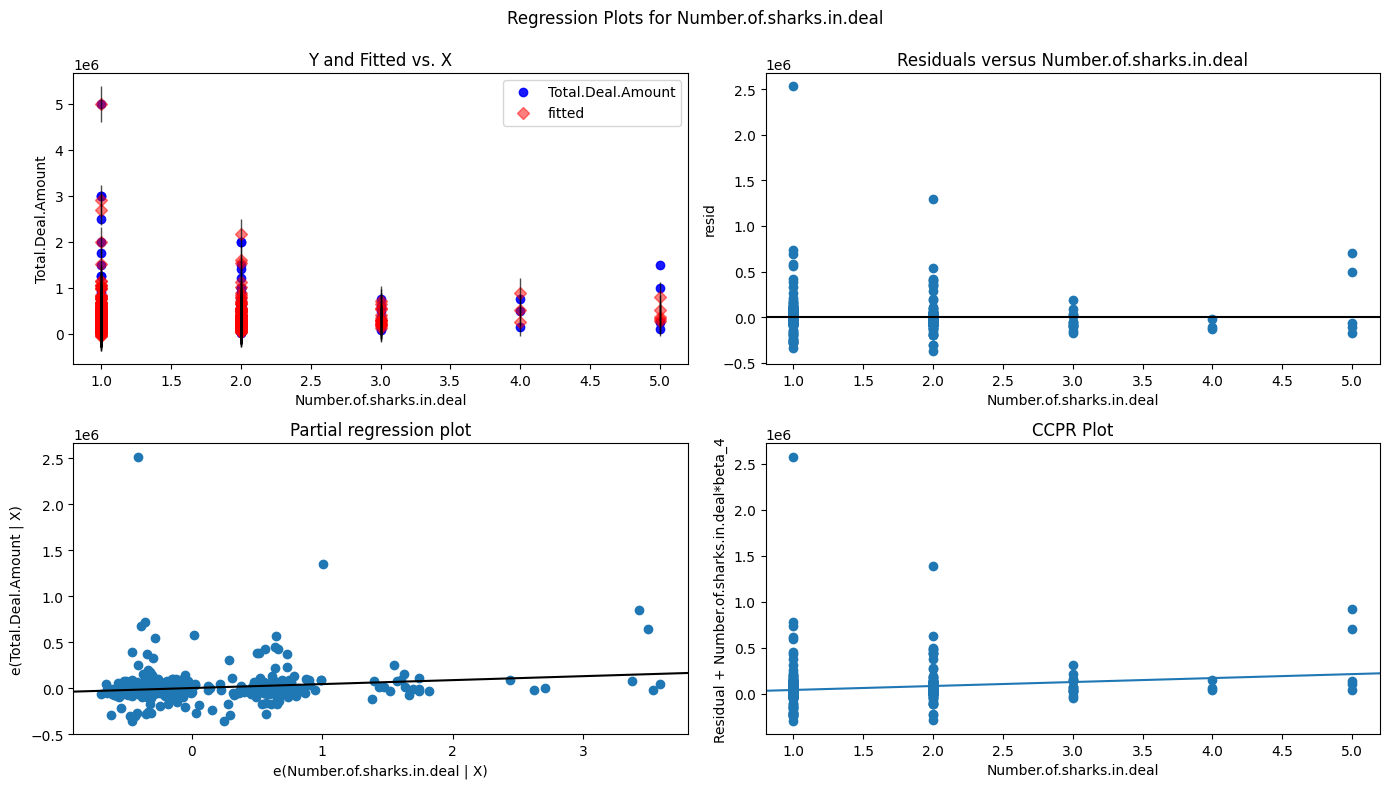

In [ ]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model_industry, 'Number.of.sharks.in.deal', fig=fig)

In [12]:
# Prediction

Yhat = model_industry.predict(X) # make the predictions by the model
Yhat.head()
# model_industry.summary()

0      44999.134572
1     514380.607126
5     545652.523135
6     419553.028753
10     14468.104700
dtype: float64

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.]),
 [Text(-1000000.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1'),
  Text(2000000.0, 0, '2'),
  Text(3000000.0, 0, '3'),
  Text(4000000.0, 0, '4'),
  Text(5000000.0, 0, '5'),
  Text(6000000.0, 0, '6')])

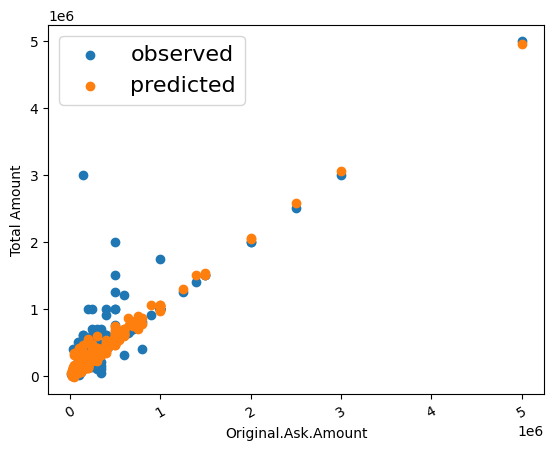

In [13]:
# Visualize
plt.scatter(df_copy['Original.Ask.Amount'], total, label='observed')
plt.scatter(df_copy['Original.Ask.Amount'], Yhat, label='predicted')
plt.legend(loc='best', fontsize=16)
plt.xlabel('Original.Ask.Amount')
plt.ylabel('Total Amount')
plt.xticks(rotation=30)

# p = df_copy.plot.scatter(x='Industry', y='Total.Deal.Amount', label='observed')
# p.scatter(x=df_copy['Industry'], y=Yhat, color='r', marker="+", label='predicted')
# plt.legend()

In [ ]:
const = (model_industry.params[0])
coefficients = list(model_industry.params[1:])

In [ ]:
def plot_fit_multiple(const, coefficients, x, y):
    
    plt.subplot(2,1,1)
    yhat = a + b*x
    print(yhat)
    residual = yhat-y
    for i in range(len(x)):
        plt.plot([x[i],x[i]],[y[i],yhat[i]],'k-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,yhat,'ks:',label=f'prediction = {a}+{b}x')
    plt.plot(x,y,'bo',label='data')
    plt.legend()

    
    plt.subplot(2,1,2)
    residual = y - yhat
    for i in range(len(x)):
        plt.plot([x[i],x[i]],[0,residual[i]],'k-')
    plt.plot(x,residual,'bo')
    plt.xlabel('x')
    plt.ylabel('residual (y - yhat)')
    plt.axhline(0,color='black',ls=':')
    sum_squares = np.round(np.sum(residual**2),2)
    plt.title(f'Sum of Squared Residuals = {sum_squares}')
    
    plt.tight_layout()

In [ ]:
def plot_fit(const, coefficients, x, y):
    
    plt.subplot(2,1,1)
    # yhat_var = lambda x: sum(coef * x ** i for i, coef in enumerate(coefficients)) 
    cols = x.columns
    for index, row in x.iterrows():
      # print(len(row))
      # print(row)
      # # print("--------------------")
      # print(coefficients)
      # print(len(coefficients))

      yhat = np.sum(row.multiply(coefficients))
      # yhat = sum(coef * row[cols[i]]  if i != 0 else coef for i, coef in enumerate(coefficients)) 
      print(f"yhat is {yhat}")
      residual = yhat-y
      print("residual is ", residual)
      # for i in range(len(x)):
      #   yhat=yhat[i]
      #   plt.plot([x[i],x[i]],[y[i],yhat[i]],'k-')

      for i in range(len(row)):
        yhat=yhat[i]
        plt.plot([row[i],row[i]],[y[i],yhat[i]],'k-')

      plt.xlabel('x')
      plt.ylabel('y')
      plt.plot(x,yhat,'ks:',label=f'prediction = {yhat}')
      plt.plot(x,y,'bo',label='data')
      plt.legend()

    
      plt.subplot(2,1,2)
      residual = y - yhat
      for i in range(len(x)):
          plt.plot([x[i],x[i]],[0,residual[i]],'k-')
      plt.plot(x,residual,'bo')
      plt.xlabel('x')
      plt.ylabel('residual (y - yhat)')
      plt.axhline(0,color='black',ls=':')
      sum_squares = np.round(np.sum(residual**2),2)
      plt.title(f'Sum of Squared Residuals = {sum_squares}')
      
      plt.tight_layout()

In [ ]:
def plot_fit(const, coefficients, x, y):
    
    plt.subplot(2,1,1)
    # yhat_var = lambda x: sum(coef * x ** i for i, coef in enumerate(coefficients)) 
    cols = x.columns

    yhat = np.sum(row.multiply(coefficients) for index, row in x.iterrows())
      # yhat = sum(coef * row[cols[i]]  if i != 0 else coef for i, coef in enumerate(coefficients)) 
    print(f"yhat is {yhat}")
    print("y is ", y)
    residual = yhat-y
    print("residual is ", residual)
      # for i in range(len(x)):
      #   yhat=yhat[i]
      #   plt.plot([x[i],x[i]],[y[i],yhat[i]],'k-')

    for i in range(len(x)):
      yhat=yhat[i]
      plt.plot([x[i],x[i]],[y[i],yhat[i]],'k-')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,yhat,'ks:',label=f'prediction = {yhat}')
    plt.plot(x,y,'bo',label='data')
    plt.legend()

    
    plt.subplot(2,1,2)
    residual = y - yhat
    for i in range(len(x)):
        plt.plot([x[i],x[i]],[0,residual[i]],'k-')
    plt.plot(x,residual,'bo')
    plt.xlabel('x')
    plt.ylabel('residual (y - yhat)')
    plt.axhline(0,color='black',ls=':')
    sum_squares = np.round(np.sum(residual**2),2)
    plt.title(f'Sum of Squared Residuals = {sum_squares}')
      
    plt.tight_layout()

In [ ]:
def ss(const, coefficients,x,y):
    yhat_var = lambda x: sum(coef * x  if i != 0 else coef for i, coef in enumerate(coefficients)) 
    yhat = yhat_var
    residual = yhat-y
    return np.sum(residual**2)

In [ ]:
print((X.columns))
print((coefficients))
print(list(model_industry.params))
print(list(model_industry.params[1:]))

Index(['const', 'Valuation.Requested', 'Royalty.Deal', 'Deal.Valuation',
       'Number.of.sharks.in.deal', 'Original.Ask.Amount',
       'Original.Offered.Equity', 'Got.Deal', 'Season.Number', 'Pitch.Number',
       'Loan', 'Multiple.Entrepreneurs', 'Original.Ask.Amount',
       'Multiple.Entrepreneurs', 'Original.Offered.Equity',
       'Barbara.Corcoran.Present', 'Mark.Cuban.Present',
       'Lori.Greiner.Present', 'Robert.Herjavec.Present',
       'Daymond.John.Present', 'Kevin.O.Leary.Present',
       'Industry_Business Services', 'Industry_Children/Education',
       'Industry_Electronics', 'Industry_Fashion/Beauty',
       'Industry_Fitness/Sports/Outdoors', 'Industry_Food and Beverage',
       'Industry_Green/CleanTech', 'Industry_Health/Wellness',
       'Industry_Lifestyle/Home', 'Industry_Media/Entertainment',
       'Industry_Pet Products', 'Industry_Software/Tech', 'Industry_Travel',
       'Industry_Uncertain/Other'],
      dtype='object')
1097
[-0.020900260550153902, -97

In [ ]:
coefficients = list(model_industry.params)
print(len(coefficients))

36


In [ ]:
total

0        50000.0
1       460000.0
2            0.0
3            0.0
4            0.0
          ...   
1092    300000.0
1093    225000.0
1094    200000.0
1095    200000.0
1096    700000.0
Name: Total.Deal.Amount, Length: 1097, dtype: float64

36
const                                    1.0
Valuation.Requested                 333333.0
Royalty.Deal                             0.0
Deal.Valuation                       90909.0
Number.of.sharks.in.deal                 1.0
Original.Ask.Amount                  50000.0
Original.Offered.Equity                 15.0
Got.Deal                                 1.0
Season.Number                            1.0
Pitch.Number                             1.0
Loan                                     0.0
Multiple.Entrepreneurs                   0.0
Original.Ask.Amount                  50000.0
Multiple.Entrepreneurs                   0.0
Original.Offered.Equity                 15.0
Barbara.Corcoran.Present                 1.0
Mark.Cuban.Present                       0.0
Lori.Greiner.Present                     0.0
Robert.Herjavec.Present                  1.0
Daymond.John.Present                     1.0
Kevin.O.Leary.Present                    1.0
Original.Offered.Equity                 15.0
Industr

IndexError: ignored

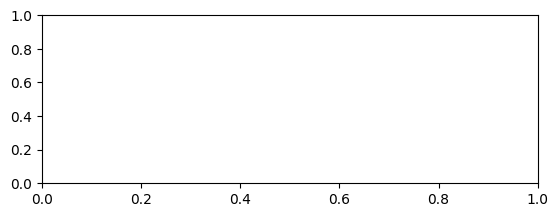

In [ ]:
plot_fit(const, coefficients, X, total)

**By Sharks**

For each shark, we build a model on several features to predict the investment amount by each shark.

In [ ]:
# filter by sharks
sharks = ['Barbara.Corcoran', 'Mark.Cuban', 'Lori.Greiner', 'Robert.Herjavec', 'Daymond.John', 'Kevin.O.Leary']
got_deal = df[df['Got.Deal'] == 1]
got_deal

,Season.Number,Season.Start,Season.End,Episode.Number,Pitch.Number,Original.Air.Date,Startup.Name,Industry,Business.Description,Pitchers.Gender,...,Kevin.O.Leary.Investment.Equity,Guest.Investment.Amount,Guest.Investment.Equity,Guest.Name,Barbara.Corcoran.Present,Mark.Cuban.Present,Lori.Greiner.Present,Robert.Herjavec.Present,Daymond.John.Present,Kevin.O.Leary.Present
0,1,08/09/2009,02/05/2010,1,1,08/09/2009,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
1,1,08/09/2009,02/05/2010,1,2,08/09/2009,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
5,1,08/09/2009,02/05/2010,2,6,08/16/2009,APerfectPear,Food and Beverage,A Perfect Pear - Specialty Food,Female,...,25.0,0.0,0.0,NaN,1,0,0,1,1,1
6,1,08/09/2009,02/05/2010,2,7,08/16/2009,ClassroomJams,Children/Education,Classroom Jams - Education,Male,...,20.0,0.0,0.0,NaN,1,0,0,1,1,1
10,1,08/09/2009,02/05/2010,3,11,08/23/2009,TurboBaster,Food and Beverage,TurboBaster - Kitchen Tools,Female,...,0.0,35000.0,100.0,Kevin Harrington,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,14,09/23/2022,04/20/2023,6,1093,11/11/2022,Collars & Co,Fashion/Beauty,MenÕs Fashion,Male,...,0.0,150000.0,5.0,Peter Jones,0,1,1,0,1,1
1093,14,09/23/2022,04/20/2023,6,1094,11/11/2022,Wondry,Food and Beverage,Cocktail Wines,Mixed,...,0.0,0.0,0.0,NaN,0,1,1,0,1,1
1094,14,09/23/2022,04/20/2023,7,1095,11/18/2022,Frsh,Fashion/Beauty,Air Fresheners Subscription Service,Male,...,0.0,0.0,0.0,NaN,1,1,1,1,0,1
1095,14,09/23/2022,04/20/2023,7,1096,11/18/2022,Actionglow,Fitness/Sports/Outdoors,LED Lighting for Sporting Equipment,Male,...,0.0,0.0,0.0,NaN,1,1,1,1,0,1


In [ ]:
def shark_model(df_copy, y):
  total = df_copy[y]

  df_copy = df_copy[['Valuation.Requested','Royalty.Deal','Deal.Valuation','Number.of.sharks.in.deal','Original.Ask.Amount',\
                    'Original.Offered.Equity', 'Got.Deal','Season.Number', 'Pitch.Number', \
                    'Loan', 'Multiple.Entrepreneurs', 'Original.Ask.Amount','Multiple.Entrepreneurs', \
            'Original.Offered.Equity', 'Barbara.Corcoran.Present', 'Mark.Cuban.Present', \
            'Lori.Greiner.Present', 'Robert.Herjavec.Present', 'Daymond.John.Present', 'Kevin.O.Leary.Present', 'Industry']]

  dumm = pd.get_dummies(data=df_copy,drop_first=True)

  X = sm.add_constant(dumm)

  model_industry = sm.OLS(total, X).fit()
  print(model_industry.summary())

In [ ]:
for shark in sharks:
  name = shark + '.Investment.Amount'
  print(f"Shark {shark}'s prediction model ")
  print(shark_model(got_deal, name))

Shark Barbara.Corcoran's prediction model 
                                    OLS Regression Results                                    
Dep. Variable:     Barbara.Corcoran.Investment.Amount   R-squared:                       0.139
Model:                                            OLS   Adj. R-squared:                  0.096
Method:                                 Least Squares   F-statistic:                     3.284
Date:                                Fri, 12 May 2023   Prob (F-statistic):           1.99e-08
Time:                                        18:43:04   Log-Likelihood:                -8085.6
No. Observations:                                 643   AIC:                         1.623e+04
Df Residuals:                                     612   BIC:                         1.637e+04
Df Model:                                          30                                         
Covariance Type:                            nonrobust                                         
       

In [ ]:
# Whether there's going to be a deal by each shark
def get_deal(df, shark):
  df_deal = df.copy()

  get_deal = df_deal['Got.Deal']

  df_deal = df_deal[['Valuation.Requested','Royalty.Deal','Deal.Valuation','Number.of.sharks.in.deal','Original.Ask.Amount',\
                    'Original.Offered.Equity', 'Season.Number', 'Pitch.Number', \
                    'Loan', 'Multiple.Entrepreneurs', 'Original.Ask.Amount','Multiple.Entrepreneurs', \
            'Original.Offered.Equity', 'Barbara.Corcoran.Present', 'Mark.Cuban.Present', \
            'Lori.Greiner.Present', 'Robert.Herjavec.Present', 'Daymond.John.Present', 'Kevin.O.Leary.Present', 'Industry']]

  dumm = pd.get_dummies(data=df_deal,drop_first=True)

  X = sm.add_constant(dumm)

  model_deal = sm.OLS(total, X).fit()
  model_deal.summary()

----------------------Ignore Gender---------------------------

In [ ]:
# Gender

clean_x = df.drop(columns=['Total.Deal.Amount', 'Investment.Amount.Per.Shark','Guest.Name','Business.Description','Industry'])
# X = sm.add_constant(df[['Original.Ask.Amount','Valuation.Requested','Original.Offered.Equity']])
# get dummies
# X = pd.get_dummies(df['Pitchers.Gender'])

X = pd.get_dummies(df['Pitchers.Gender'])

model = sm.OLS(df['Total.Deal.Amount'], sm.add_constant(X)).fit()
# model = sm.OLS(df['Total.Deal.Amount'], X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total.Deal.Amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.272
Date:                Fri, 12 May 2023   Prob (F-statistic):              0.283
Time:                        18:43:04   Log-Likelihood:                -15446.
No. Observations:                1097   AIC:                         3.090e+04
Df Residuals:                    1093   BIC:                         3.092e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.75e+18   2.66e+18     -0.658      0.511   -6.97e+18    3.47e+18
Female       1.75e+18   2.66e+18      0.658      0.511   -3.47e+18    6.97e+18
Male         1.75e+18   2.66e+18      0.658      0.511   -3.47e+18    6.97e+18
Mixed        1.75e+18   2.66e+18      0.658      0.511   -3.47e+18    6.97e+18
==============================================================================
Omnibus:                     1356.119   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213392.376
Skew:                           6.280   Prob(JB):                         0.00
Kurtosis:                      70.163   Cond. No.                     6.71e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.53e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

KeyError: ignored

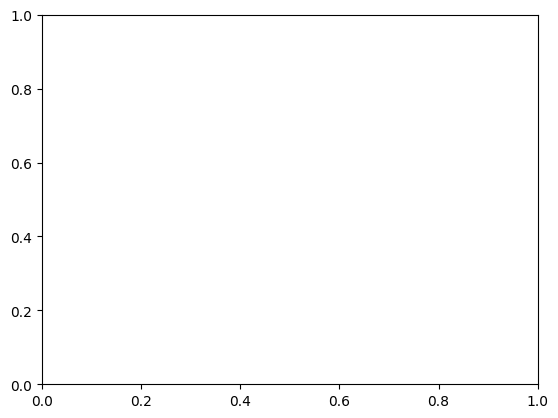

In [ ]:
# Visualize
p = df_copy.plot.scatter(x='industry', y='amount', label='observed')
p.scatter(x=df_copy['Industry'], y=Yhat, color='r', marker="+", label='predicted')
plt.legend()

In [ ]:
df.columns

In [ ]:
# Industry
# clean_x = df.drop(columns=['Total.Deal.Amount', 'Investment.Amount.Per.Shark'])
# X = sm.add_constant(df[['Original.Ask.Amount','Valuation.Requested','Original.Offered.Equity']])
# get dummies
dumm = ['Season.Number', 'Pitch.Number', 'Industry',
       'Pitchers.Gender', 'Pitchers.City',
       'Pitchers.State', 'Multiple.Entrepreneurs',
       'Original.Ask.Amount', 'Original.Offered.Equity', 'Valuation.Requested',
       'Got.Deal', 'Total.Deal.Amount', 'Total.Deal.Equity', 'Deal.Valuation',
       'Number.of.sharks.in.deal', 'Investment.Amount.Per.Shark',
       'Equity.Per.Shark', 'Royalty.Deal', 'Loan',
       'Barbara.Corcoran.Investment.Amount',
       'Barbara.Corcoran.Investment.Equity', 'Mark.Cuban.Investment.Amount',
       'Mark.Cuban.Investment.Equity', 'Lori.Greiner.Investment.Amount',
       'Lori.Greiner.Investment.Equity', 'Robert.Herjavec.Investment.Amount',
       'Robert.Herjavec.Investment.Equity', 'Daymond.John.Investment.Amount',
       'Daymond.John.Investment.Equity', 'Kevin.O.Leary.Investment.Amount',
       'Kevin.O.Leary.Investment.Equity', 'Guest.Investment.Amount',
       'Guest.Investment.Equity', 'Guest.Name', 'Barbara.Corcoran.Present',
       'Mark.Cuban.Present', 'Lori.Greiner.Present', 'Robert.Herjavec.Present',
       'Daymond.John.Present', 'Kevin.O.Leary.Present']
X = pd.get_dummies(df.drop(columns=['Total.Deal.Amount', 'Investment.Amount.Per.Shark']))
# X['Season.Start']
X
# model = sm.OLS(df['Total.Deal.Amount'], sm.add_constant(X)).fit()
# # model = sm.OLS(df['Total.Deal.Amount'], X).fit()
# model.summary()

In [ ]:
# X_gender = sm.add_constant(df_copy['Pitchers.Gender'])


# model = sm.OLS(df['Total.Deal.Amount'], X_gender).fit()
# model.summary()